In [1]:
## Date Reading

In [2]:
## import the necessary packages
from skimage.exposure import rescale_intensity
import numpy as np
from PIL import Image
import pytesseract
import cv2
from pytesseract import Output
import pandas as pd
import math
import re

width/columns = 2528, height/rows = 3504


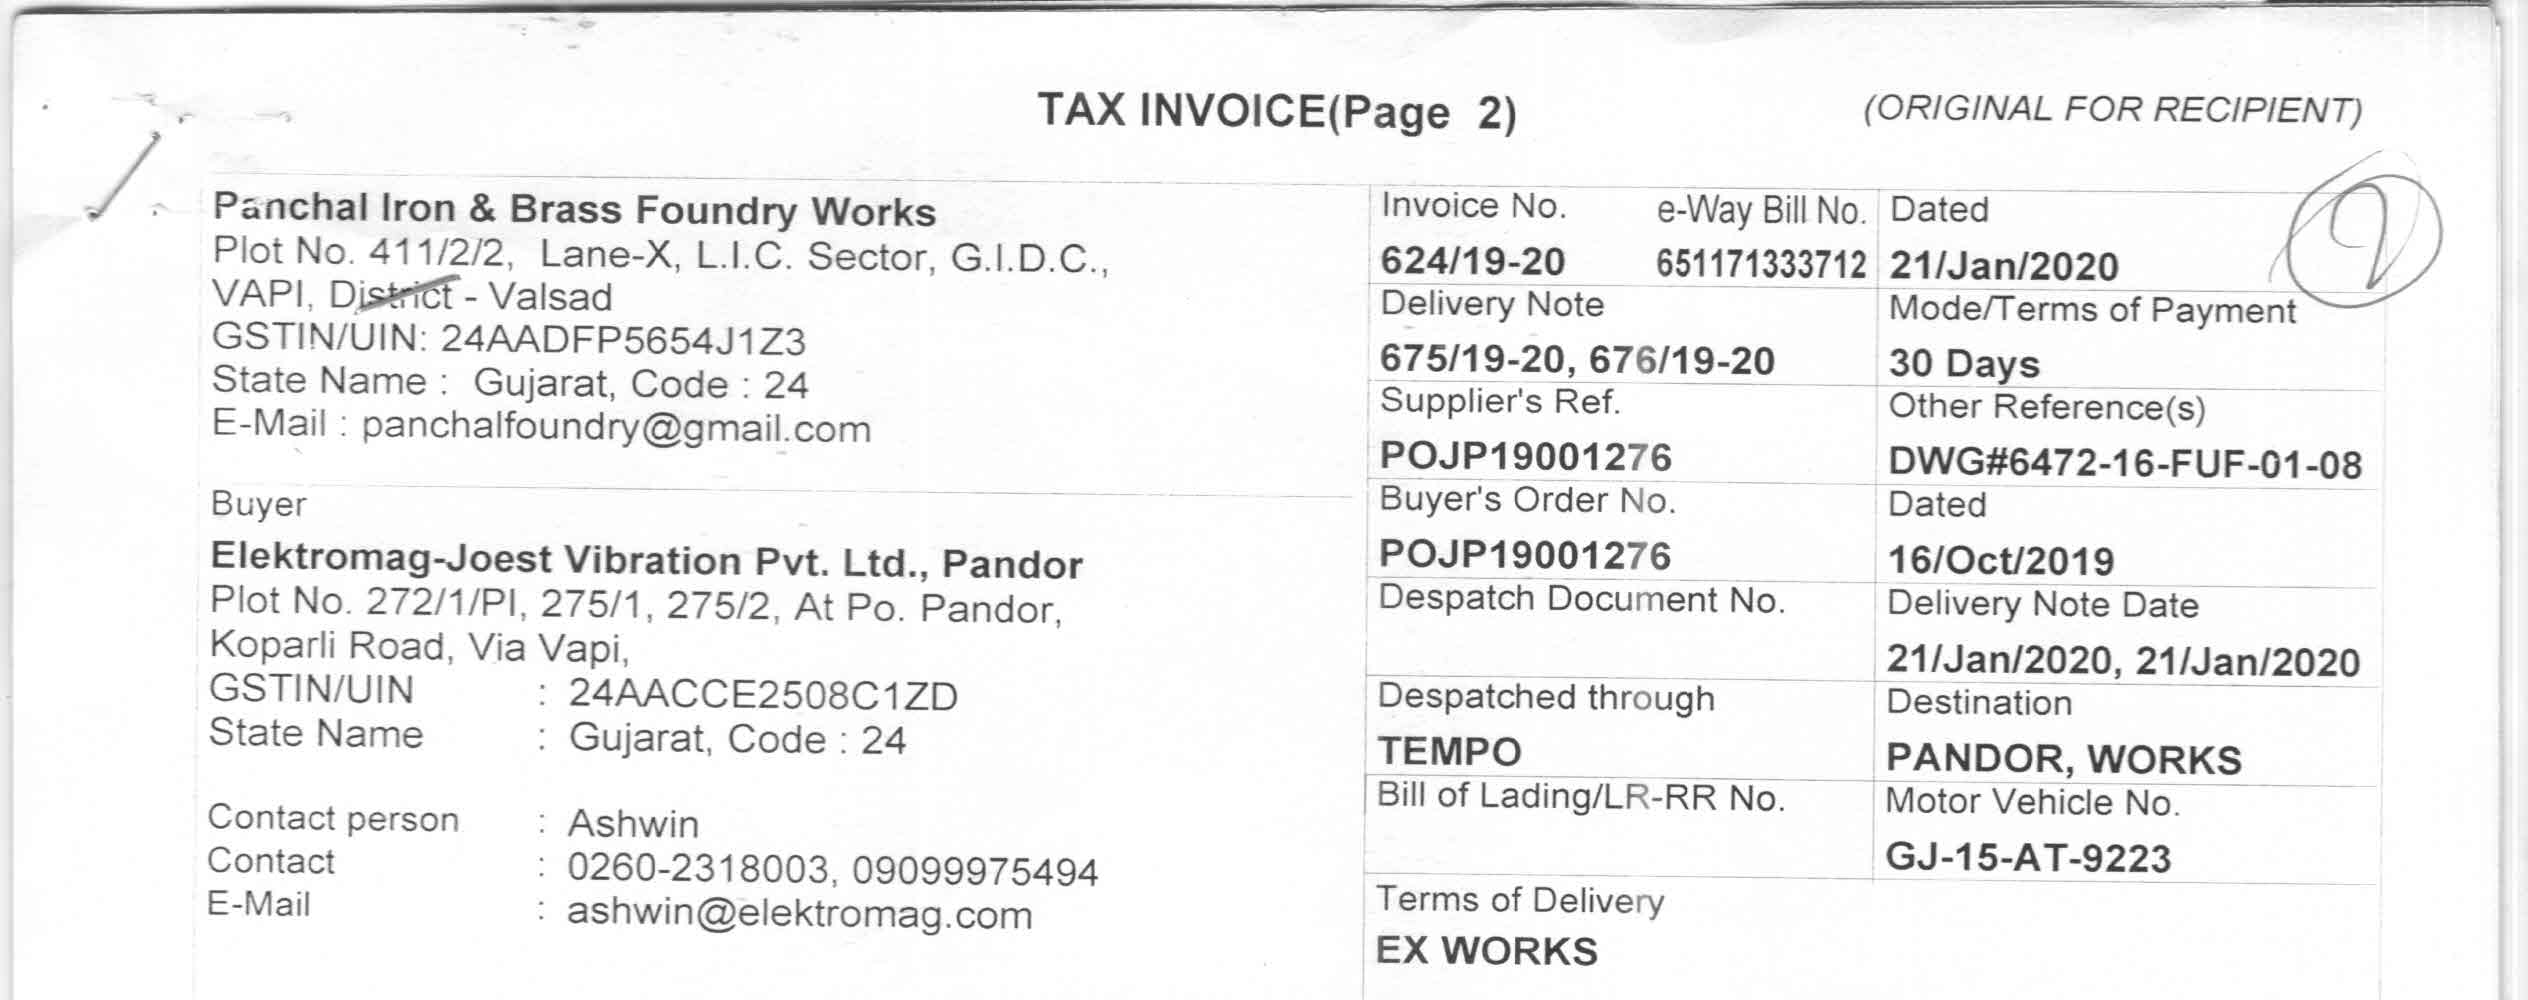

In [48]:
image_1 = cv2.imread("INVOICE2.jpg", 0) ## Loading image directly as black & white.
(H, W) = image_1.shape # H = no. of rows, W = no. of columns
print("width/columns = {}, height/rows = {}".format(W, H))
# Display in original size :
image_pil_1 = Image.fromarray(image_1[0:1000, :])

display(image_pil_1) 

In [49]:
## Converting image to text and create pandas dataframe with all text cordinates and making texts in lower case

image_1_data = pytesseract.image_to_data(image_1, output_type=Output.DICT)
image_1_pd = pd.DataFrame(image_1_data)

image_1_pd_sorted =image_1_pd.sort_values(['top', 'left']).reset_index()
image_1_pd_sorted['text'] = image_1_pd_sorted['text'].map(lambda x: x if type(x)!=str else x.lower()) ## make Items in lower case

image_1_pd_sorted[0:50]

,index,block_num,conf,height,left,level,line_num,page_num,par_num,text,top,width,word_num
0,0,0,-1,3504,0,1,0,1,0,,0,2528,0
1,147,12,-1,19,14,2,0,1,0,,0,2481,0
2,148,12,-1,19,14,3,0,1,1,,0,2481,0
3,149,12,-1,19,14,4,1,1,1,,0,2481,0
4,150,12,95,19,14,5,1,1,1,,0,2481,1
5,1,1,-1,45,1038,2,0,1,0,,92,477,0
6,2,1,-1,45,1038,3,0,1,1,,92,477,0
7,3,1,-1,45,1038,4,1,1,1,,92,477,0
8,4,1,91,34,1038,5,1,1,1,tax,92,87,1
9,5,1,91,45,1142,5,1,1,1,invoice(page,92,308,2


In [50]:
# Regex expression for date dd/mm/yyyy = ^\d{1,2}\/\d{1,2}\/\d{4}$ OR
#                                        ^(0[1-9]|1[012])[- /.] (0[1-9]|[12][0-9]|3[01])[- /.] (19|20)\d\d$
# Regex expression for date dd/mmm/yyyy = ^(0[1-9]|[12][0-9]|3[01])[- /.]


date_pattern_1 = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$' # dd/mm/yyyy

date_pattern_2 = '^\d{2}/[a-zA-Z]{3}/\d{4}$' # dd/mmm/yyyy

date_pattern_3 = '^\d{2}-[a-zA-Z]{3}-\d{4}$' # dd-mmm-yyyy



date_lst = []

for i in range(len(image_1_pd_sorted)):
    
    
    if re.match(date_pattern_1, image_1_pd_sorted['text'][i]):
  
        date_lst.append(image_1_pd_sorted['text'][i])
        
           
    if re.match(date_pattern_2, image_1_pd_sorted['text'][i]):
    
        date_lst.append(image_1_pd_sorted['text'][i])
        
        
    if re.match(date_pattern_3, image_1_pd_sorted['text'][i]):
    
        date_lst.append(image_1_pd_sorted['text'][i])   
        
        
print(date_lst)
            

['21/jan/2020']


In [55]:
# Another way of doing above :

image_1_po_pd= image_1_pd_sorted[image_1_pd_sorted['text'].str.count('^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$')>0].reset_index(drop=True)
image_1_po_pd= image_1_po_pd.append(image_1_pd_sorted[image_1_pd_sorted['text'].str.count('^\d{2}/[a-zA-Z]{3}/\d{4}$')>0].reset_index(drop=True))
image_1_po_pd= image_1_po_pd.append(image_1_pd_sorted[image_1_pd_sorted['text'].str.count('^\d{2}-[a-zA-Z]{3}-\d{4}$')>0].reset_index(drop=True))

image_1_po_pd

## If len(image_1_po_pd) > 1, then find the minm of text(dates) and print.

,index,block_num,conf,height,left,level,line_num,page_num,par_num,text,top,width,word_num
0,146,11,90,40,1891,5,2,1,1,21/jan/2020,250,228,2
